In [43]:
%pylab inline
import SimpleITK as sitk
import numpy as np
from scipy.ndimage import gaussian_filter
from copy import deepcopy

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [19]:
def region_growing(image, seed,threshold):
    region=np.zeros_like(image)   
    # Creo una matrice di booleani che indica quali pixel soddisfano il criterio 
    mask=np.abs(image-seed)<=threshold 
    region[mask]=image[mask]
    #assegno gli elementi dell'immagine che si trovano in corrispondenza dei true, alla regione di zeri
    return region


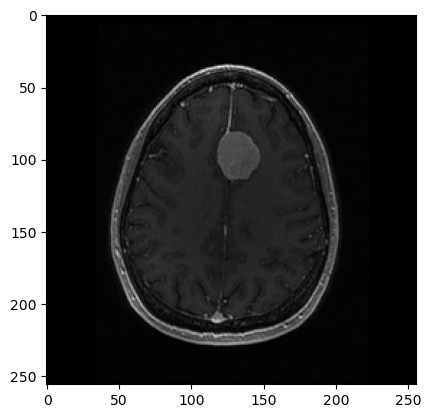

In [20]:
import SimpleITK as sitk
import numpy as np

# Carico il file NRRD
brain_sitk=sitk.ReadImage("DATA/MRBrainTumor1.nrrd")
# Ottengo l'array NumPy dall'immagine

brain_array = sitk.GetArrayFromImage(brain_sitk)
brain_72=brain_array[72,:,:]
imshow(brain_72,cmap="gray") #immagine normale
#brain_sitk.GetSize()
#brain_array.shape 

In [8]:
media=np.mean(brain_72)
media
#utilizzo come soglia la media dell e intesità oppure nserire direttamente
#il valore numerico della threshold con più tentativi

43.20872497558594

In [38]:
seed=brain_sitk.GetPixel(132,92,72) #(x,y,z)
#seed=brain_72[92,132] #ottengo il valore di intensità pixel seed posizionato in prossimità
                      #del centro della massa (z,y,x)
seed

186

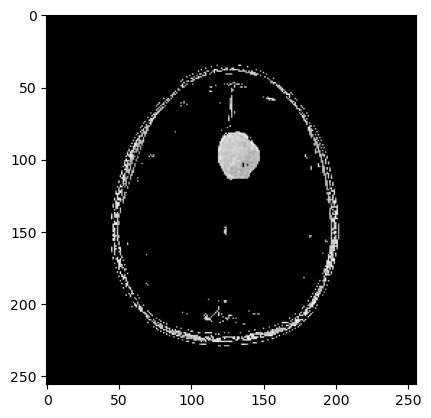

In [26]:
# Applica l'algoritmo di region growing fornisco al metodo l'immagine da segmentare, il seed e la soglia 
brain_segmentato=region_growing(brain_72, seed,media)
imshow(brain_segmentato,cmap="gray")

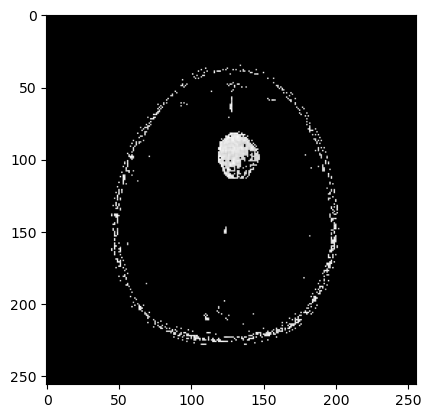

In [12]:
brain_segmentato2=region_growing(brain_72, seed,20)
imshow(brain_segmentato2,cmap="gray")

In [13]:
from skimage import filters
from skimage import feature
from skimage import data
from skimage.color import rgb2gray

In [14]:
#calcolo la soglia anche con un tresholding di tipo isodata/Otsu
brain_otsu_threshold = filters.threshold_otsu(brain_72)
brain_otsu_threshold 


63

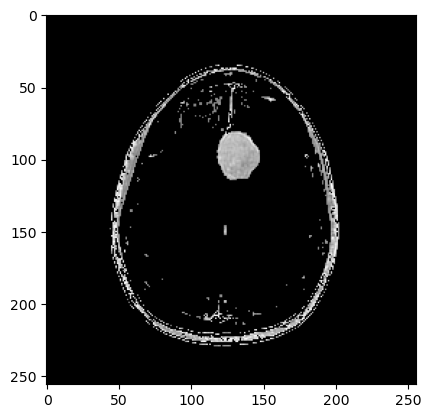

In [15]:
brain_segmentato3=region_growing(brain_72, seed,brain_otsu_threshold)
imshow(brain_segmentato3,cmap="gray")

In [ ]:
#Infine applico dei filtri morfologici per l'operazione di opening

In [16]:
from scipy.ndimage import morphology

/tmp/ipykernel_5427/2733201932.py:1: DeprecationWarning: Please use `binary_erosion` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  eroded = morphology.binary_erosion(brain_segmentato3, iterations=4)
/tmp/ipykernel_5427/2733201932.py:2: DeprecationWarning: Please use `binary_dilation` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  dilatated = morphology.binary_dilation(eroded, iterations=4)


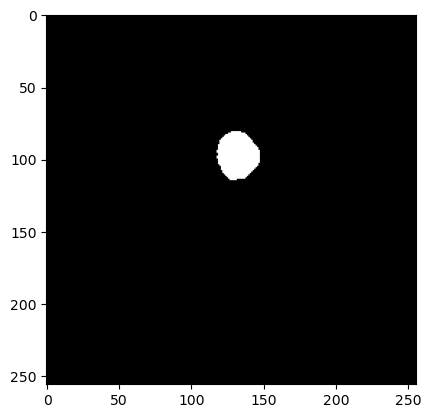

In [42]:
eroded = morphology.binary_erosion(brain_segmentato3, iterations=4)
dilatated = morphology.binary_dilation(eroded, iterations=4)
imshow(dilatated,cmap="gray")
